### Test Docling

In [9]:
from docling.document_converter import DocumentConverter

file = '../../data/papers/Rajkumar et al. - 2022 - Evaluating the Text-to-SQL Capabilities of Large L.pdf'
converter = DocumentConverter()
document = converter.convert(file)

print(document.document.origin.filename)

c:\Users\Arm\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\cpp_extension.py:382: UserWarning: Error checking compiler version for cl: [WinError 2] The system cannot find the file specified
  warnings.warn(f'Error checking compiler version for {compiler}: {error}')
c:\Users\Arm\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Could not load the custom kernel for multi-scale deformable attention: Command '['where', 'cl']' returned non-zero exit status 1.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing Mult

Rajkumar et al. - 2022 - Evaluating the Text-to-SQL Capabilities of Large L.pdf


In [27]:
print(document.document)

schema_name='DoclingDocument' version='1.5.0' name='Rajkumar et al. - 2022 - Evaluating the Text-to-SQL Capabilities of Large L' origin=DocumentOrigin(mimetype='application/pdf', binary_hash=2355541156686147883, filename='Rajkumar et al. - 2022 - Evaluating the Text-to-SQL Capabilities of Large L.pdf', uri=None) furniture=GroupItem(self_ref='#/furniture', parent=None, children=[], content_layer=<ContentLayer.FURNITURE: 'furniture'>, name='_root_', label=<GroupLabel.UNSPECIFIED: 'unspecified'>) body=GroupItem(self_ref='#/body', parent=None, children=[RefItem(cref='#/texts/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/texts/2'), RefItem(cref='#/texts/3'), RefItem(cref='#/texts/4'), RefItem(cref='#/texts/5'), RefItem(cref='#/tables/0'), RefItem(cref='#/texts/6'), RefItem(cref='#/texts/7'), RefItem(cref='#/texts/8'), RefItem(cref='#/texts/9'), RefItem(cref='#/texts/10'), RefItem(cref='#/texts/11'), RefItem(cref='#/texts/12'), RefItem(cref='#/texts/13'), RefItem(cref='#/texts/14'), RefIte

### Test Chunking

In [29]:
from docling.chunking import HybridChunker
from docling_core.transforms.chunker.tokenizer.huggingface import HuggingFaceTokenizer
from transformers import AutoTokenizer

TOKENIZER_MODEL="BAAI/bge-m3"
MAX_TOKENS=8192

tokenizer = HuggingFaceTokenizer(
        tokenizer=AutoTokenizer.from_pretrained(TOKENIZER_MODEL),
        max_tokens=MAX_TOKENS,
    )

chunker = HybridChunker(
    tokenizer=tokenizer,
    merge_peers=True
)

chunk_iter = chunker.chunk(dl_doc=document.document)
chunks = list(chunk_iter)

In [50]:
chunks[18].text

'GPT-3, Prompt = . GPT-3, VA = . GPT-3, EX = . GPT-3, TS = . ada, Prompt = Question. ada, VA = 1.2 (1.0). ada, EX = 0.0 (0.0). ada, TS = 0.0 (0.0). ada, Prompt = Docs. ada, VA = 3.4 (2.2). ada, EX = 0.2 (0.2). ada, TS = 0.1 (0.0). ada, Prompt = 1 Row. ada, VA = 40.1 (34.6). ada, EX = 1.1 (0.6). ada, TS = 0.2 (0.0). ada, Prompt = Schema. ada, VA = 33.8 (33.9). ada, EX = 2.3 (3.5). ada, TS = 0.3 (0.0). babbage, Prompt = Question. babbage, VA = 4.4 (2.0). babbage, EX = 1.0 (0.2). babbage, TS = 1.0 (0.2). babbage, Prompt = Docs. babbage, VA = 22.5 (20.3). babbage, EX = 1.0 (0.6). babbage, TS = 0.7 (0.2). babbage, Prompt = 1 Row. babbage, VA = 56.0 (49.8). babbage, EX = 5.1 (1.6). babbage, TS = 3.9 (0.0). babbage, Prompt = Schema. babbage, VA = 48.8 (44.9). babbage, EX = 5.7 (0.8). babbage, TS = 3.9 (0.0). curie, Prompt = Question. curie, VA = 9.0 (6.7). curie, EX = 2.9 (2.4). curie, TS = 2.5 (1.8). curie, Prompt = Docs. curie, VA = 25.2 (25.0). curie, EX = 7.4 (5.5). curie, TS = 6.3 (3.3).

In [11]:
# Checking the documents metadata
chunks[0].model_dump()['meta']

{'schema_name': 'docling_core.transforms.chunker.DocMeta',
 'version': '1.0.0',
 'doc_items': [{'self_ref': '#/texts/2',
   'parent': {'cref': '#/body'},
   'children': [],
   'content_layer': <ContentLayer.BODY: 'body'>,
   'label': <DocItemLabel.TEXT: 'text'>,
   'prov': [{'page_no': 1,
     'bbox': {'l': 142.048,
      't': 724.8820146484375,
      'r': 455.715,
      'b': 712.6010146484375,
      'coord_origin': <CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>},
     'charspan': (0, 61)}]},
  {'self_ref': '#/texts/3',
   'parent': {'cref': '#/body'},
   'children': [],
   'content_layer': <ContentLayer.BODY: 'body'>,
   'label': <DocItemLabel.TEXT: 'text'>,
   'prov': [{'page_no': 1,
     'bbox': {'l': 72.983,
      't': 710.9350146484375,
      'r': 525.283,
      'b': 698.6730146484375,
      'coord_origin': <CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>},
     'charspan': (0, 93)},
    {'page_no': 1,
     'bbox': {'l': 138.186,
      't': 693.0410146484376,
      'r': 460.079,
      'b': 672.0820

In [12]:
processed_chunks = [
    {
        "text": chunk.text,
        "metadata": {
            "filename": chunk.meta.origin.filename,
            "page_numbers": [
                page_no
                for page_no in sorted(
                    set(
                        prov.page_no
                        for item in chunk.meta.doc_items 
                        for prov in item.prov
                    )
                )
            ] or None,
            "title": chunk.meta.headings[0] if chunk.meta.headings else None
        },
    }
    for chunk in chunks
]

In [13]:
processed_chunks

[{'text': 'Nitarshan Rajkumar 1 ∗ , Raymond Li 2 , Dzmitry Bahdanau 2345\n1 University of Cambridge, 2 ServiceNow, 3 Mila, 4 McGill University, 5 Canada CIFAR AI Chair nr500@cam.ac.uk , {raymond.li,dzmitry.bahdanau}@servicenow.com https://github.com/nitarshan/codex-text2sql',
  'metadata': {'filename': 'Rajkumar et al. - 2022 - Evaluating the Text-to-SQL Capabilities of Large L.pdf',
   'page_numbers': [1],
   'title': 'Evaluating the Text-to-SQL Capabilities of Large Language Models'}},
 {'text': 'Weperform an empirical evaluation of Text-toSQLcapabilities of the Codex language model. We find that, without any finetuning , Codex is a strong baseline on the Spider benchmark; we also analyze the failure modes of Codex in this setting. Furthermore, we demonstrate on the GeoQuery and Scholar benchmarks that a small number of in-domain examples provided in the prompt enables Codex to perform better than state-of-the-art models finetuned on such few-shot examples.\nFinetuned, VA = . Finetun

### Test LanceDB

In [13]:
import lancedb
from lancedb.embeddings import get_registry
from lancedb.pydantic import LanceModel, Vector
from typing import List
db = lancedb.connect("data/lancedb")

func = get_registry().get("huggingface").create(name="BAAI/bge-m3")

class ChunkMetadata(LanceModel):
    filename: str | None
    page_numbers: List[int] | None
    title: str | None

class Chunks(LanceModel):
    text: str = func.SourceField()
    vector: Vector(func.ndims()) = func.VectorField()
    metadata: ChunkMetadata

table = db.create_table("docling", schema=Chunks, mode="overwrite")

In [14]:
table.add(processed_chunks)

AddResult(version=5)

In [15]:
table.to_pandas()

,text,vector,metadata
0,"Nitarshan Rajkumar 1 ∗ , Raymond Li 2 , Dzmitr...","[-0.78064847, -0.6215737, -0.054674, -0.432377...",{'filename': 'Rajkumar et al. - 2022 - Evaluat...
1,Weperform an empirical evaluation of Text-toSQ...,"[-0.120063834, -0.045762237, -0.5438429, -0.41...",{'filename': 'Rajkumar et al. - 2022 - Evaluat...
2,Translating natural language questions to SQL ...,"[-0.28520018, 0.22423948, -0.80753446, -0.2401...",{'filename': 'Rajkumar et al. - 2022 - Evaluat...
3,Models Our evaluation focuses on the models ac...,"[-0.42964467, -0.2103245, -0.8857349, 0.089260...",{'filename': 'Rajkumar et al. - 2022 - Evaluat...
4,We present results for different model sizes i...,"[-0.24677238, -0.031411406, -1.042435, 0.44577...",{'filename': 'Rajkumar et al. - 2022 - Evaluat...
5,"Test-Suite Correct, % = 55.1. Test-Suite Corre...","[-0.35032934, -0.08510566, -0.9685182, 0.38489...",{'filename': 'Rajkumar et al. - 2022 - Evaluat...
6,We investigate whether Codex can perform fewsh...,"[-0.33053172, -0.1945703, -0.83300745, -0.0667...",{'filename': 'Rajkumar et al. - 2022 - Evaluat...
7,Figure 2 shows test-suite accuracies on the Sc...,"[-0.3464091, -0.7492556, -1.1772914, -0.497547...",{'filename': 'Rajkumar et al. - 2022 - Evaluat...
8,We demonstrated that generative language model...,"[-0.90213984, 0.15815024, -0.24242547, -0.3808...",{'filename': 'Rajkumar et al. - 2022 - Evaluat...
9,Nitarshan performed all zero-shot and finetuni...,"[-0.29687858, -0.33640572, -0.13655071, -0.359...",{'filename': 'Rajkumar et al. - 2022 - Evaluat...


### Test LanceDB from local store

In [66]:
import lancedb
db = lancedb.connect("../../data/lancedb")
table = db.open_table("docling")

In [69]:
query = "Which prompt template gave the highest zero-shot accuracy on Spider in Zhang et al. (2024)?"
results = table.search(query).limit(20).to_pandas()

In [70]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
results

,text,vector,metadata,_distance
0,Table 3: EX (%) of 8 zero-shot prompt templates on Spider dev set.,"[0.456886, -0.015266305, -0.51754266, -1.0368919, 0.93058836, -0.9608184, -0.22047496, 1.9803436, 1.29545, -0.49602422, 0.5864691, 0.5928373, -0.63983774, -0.4064582, -0.6865581, -0.36048654, -1.9303463, 0.49399528, -0.64536345, -1.0072038, 0.6880065, 0.23399775, -0.6492799, -0.935328, -0.5353769, -0.5242988, -1.839776, -0.954744, -0.42470783, -0.30745998, -0.1601865, 0.043781485, -0.7152971, -0.9279941, -1.5376971, 1.2244387, 0.6279755, 0.02626552, -0.94020176, 1.1679775, -0.29402992, 0.43124738, 0.03261534, -1.1585644, -0.19299826, 0.6803218, 0.8742654, 0.3877464, -0.14506513, 1.4091882, 1.1027054, 0.6127636, -1.1975815, -1.1393831, -0.5623855, 0.7610365, -1.2473738, 1.3475821, 0.014632175, 0.52225083, -0.9329766, -0.13921599, 0.6704739, -0.538473, -0.70183575, 0.99851596, 0.37338027, 0.87391853, -0.87912065, 0.8526263, -0.84310627, 0.026026051, -0.2111595, -0.44653758, -0.5439429, -0.6204592, 1.3460587, -0.69268274, 0.5891755, -0.16828427, 2.36122, 0.24914463, 0.1899314, -0.7012823, 0.8408321, 0.9825632, 0.5078992, 0.91200733, 0.4943304, 1.3994541, -0.64477426, 1.60497, 0.54950017, -0.91648054, -0.9298092, 0.14681335, 0.2015189, 1.5922586, -0.8553715, -0.5999826, ...]","{'filename': 'Zhang et al. - 2024 - Benchmarking the Text-to-SQL Capability of Large L.pdf', 'page_numbers': [7], 'title': '4.1.1 Zero-shot Prompting Optimization.'}",150.332886
1,"Below contains an example of a zero-shot normalized prompt, which contains the database Network_1 from Spider (Yu et al., 2018), a task instruction 'Using valid SQLite, answer the following questions for the tables provided above.', and a test question 'How many high schoolers are there?'.","[0.29498237, -0.13961455, -0.47858998, -0.61313325, 0.81378293, -0.71027726, -0.21308805, 1.0551766, 0.7912763, -0.7340319, 0.05210549, 0.04238375, -0.29772013, 0.026909156, 0.19857803, 0.10644443, -1.4828908, 0.5842206, -0.424383, -0.9207973, 0.5423532, -0.03377683, -0.55400807, -0.5025465, 0.1805204, -0.41577315, -0.5647791, -0.74480414, -1.0255077, -0.6317712, -0.19939962, -0.120589934, -0.17533118, -0.922684, -1.3094655, 1.1871296, 0.6028525, 0.14771341, -1.1440479, 0.8105337, -0.05143338, 0.64866996, 0.47451568, -0.47122225, -0.72658086, 0.92422014, 1.010896, -0.32974738, -0.24365768, 1.22315, 0.04982746, 0.46927124, -0.7586606, -0.7504756, -0.13096283, 0.3720825, -0.6563026, 0.89916134, -0.7243548, 0.053338017, -0.81330913, 0.10588709, -0.05826899, 0.013294928, -0.48129642, 0.6826721, 0.48786247, 0.74734426, -0.9479291, 0.60502213, -0.4063461, 0.43482342, -0.45404115, -0.26988614, -0.27156112, -0.7742706, 1.075763, -0.41188398, 0.89843696, -0.23595826, 1.6377012, 0.12761237, -0.13596505, -0.7698713, 0.30769673, 0.33214793, 0.59426033, 1.2527885, 0.08723739, 0.67869014, -0.1426424, 0.6990676, -0.017990926, -0.56327796, -0.29974186, -0.36505246, -0.2054434, 0.55965835, -0.19284715, -0.2821968, ...]","{'filename': 'Chang and Fosler-Lussier - 2023 - How to Prompt LLMs for Text-to-SQL A Study in Zer.pdf', 'page_numbers': [11], 'title': 'A.1 Prompt Examples'}",184.485352
2,"In the zero-shot setting, we focus on comparing different prompt constructions for databases. Table\n2 Weemploy the Code-davinci-002 version of Codex across all settings. In zero-shot and single-domain setups, we utilize the gpt-3.5-turbo-0301 version of ChatGPT. For crossdomain experiments involving ChatGPT-16K, we turned to gpt-3.5-turbo-16k-0613 due to its extended context length.","[0.5187997, 0.23654936, -0.24226905, -0.47132382, 0.99238646, -0.5631403, -0.17906266, 1.3385344, 0.915846, -0.6234843, 0.4725437, -0.044893205, -0.40553305, 0.038284965, -0.20769678, 0.088977866, -1.8687446, 0.3060002, -0.8397949, -0.5321927, 0.974946, 0.09498023, -0.4276485, -0.54043025, -0.41763124, -0.34292114, -0.8846472, -0.6677968, -0.30282867, -0.30901545, -0.29164767, 0.113755085, -0.6018905, -0.6755428, -0.77864146, 0.714323, 0.3139

### Test Agents

In [1]:
from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langchain.tools import tool
from langchain_tavily import TavilySearch
from langgraph_supervisor import create_supervisor
from dotenv import load_dotenv
import lancedb

model = init_chat_model(
    model = "llama3.1:8b",
    temperature = 0,
    model_provider = "ollama"
)

load_dotenv()

# create pdf search tool
@tool("search_vectorDB")
def search_vectorDB(query: str, num_results: int = 3) -> str:
    """
    Search the LanceDB 'docling' table for relevant context.
    Args:
        query: The search query text.
        num_results: The number of top results to return.
    Returns:
        A string containing the top matching chunks.
    """
    db = lancedb.connect("../../data/lancedb")
    table = db.open_table(name="docling")

    results_df = table.search(query).limit(num_results).to_pandas()
    # Format into a single text block
    if "text" in results_df.columns:
        return "\n\n".join(results_df["text"].tolist())
    else:
        return results_df.to_string()

# supervisor_agent = create_supervisor(
#     [pdf_agent, web_agent],
#     model=model,
#     prompt=(
#         """
#             You are a supervisor who manages two agents.
#             Search for information from pdf using pdf_agent.
#             If information are not found in pdf_agent use web_agent to search for information instead.
#         """
#     )
# )

# input_message = {"role": "user", "content": "Hi!"}
# response = web_agent.invoke({"messages": [input_message]})

# for message in response["messages"]:
#     message.pretty_print()


In [2]:
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph import MessagesState, END
from langgraph.types import Command

from typing import Literal

def get_next_node(last_message: BaseMessage, goto: str):
    if "FINAL ANSWER" in last_message.content:
        # Any agent decided the work is done
        return END
    return goto

def make_system_prompt(suffix: str) -> str:
    return (
        "You are a helpful AI assistant, collaborating with other assistants."
        "Use pdf_agent first to search for information."
        "If information are not found using pdf_agent, use web_agent to search information on website instead."
        "If you or any of the other assistants have the final answer or deliverable,"
        "prefix your response with FINAL ANSWER so the team knows to stop."
        f"\n{suffix}"
    )

# create pdf agent
pdf_agent = create_react_agent(model=model,
                               tools=[search_vectorDB],
                               prompt=make_system_prompt("You task is to search for information from pdf (stored as vectorDB) and display it. Only go to web agent if the information could not be found from pdf files."))

# create web agent
web_agent = create_react_agent(model=model,
                               tools=[TavilySearch(max_results=3)],
                               prompt=make_system_prompt("Your task is to search for information and display information found on website."))

def pdf_node(
    state: MessagesState,
) -> Command[Literal["search_web", END]]:
    result = pdf_agent.invoke(state)
    goto = get_next_node(result["messages"][-1], "search_web")
    # wrap in a human message, as not all providers allow
    # AI message at the last position of the input messages list
    result["messages"][-1] = HumanMessage(
        content=result["messages"][-1].content, name="search_pdf"
    )
    return Command(
        update={
            # share internal message history of research agent with other agents
            "messages": result["messages"],
        },
        goto=goto,
    )

def web_node(
    state: MessagesState,
) -> Command[Literal["search_pdf", END]]:
    result = web_agent.invoke(state)
    goto = get_next_node(result["messages"][-1], "search_pdf")
    # wrap in a human message, as not all providers allow
    # AI message at the last position of the input messages list
    result["messages"][-1] = HumanMessage(
        content=result["messages"][-1].content, name="search_web"
    )
    return Command(
        update={
            # share internal message history of research agent with other agents
            "messages": result["messages"],
        },
        goto=goto,
    )

from langgraph.graph import StateGraph, START

workflow = StateGraph(MessagesState)
workflow.add_node("search_pdf", pdf_node)
workflow.add_node("search_web", web_node)

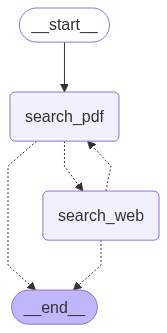

In [3]:
workflow.add_edge(START, "search_pdf")
graph = workflow.compile()

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [84]:
events = graph.stream(
    {
        "messages": [
            {
                "role" : "user",
                "content" : "What is the t5 model finetuned on?"
            }
        ],
    },
)
for s in events:
    print(s)
    print("----")

{'search_pdf': {'messages': [HumanMessage(content='What is the t5 model finetuned on?', additional_kwargs={}, response_metadata={}, id='32cc1c0b-ba84-4084-9b66-b813104a90be'), AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.1:8b', 'created_at': '2025-08-13T10:31:52.650523Z', 'done': True, 'done_reason': 'stop', 'total_duration': 759456800, 'load_duration': 27109200, 'prompt_eval_count': 322, 'prompt_eval_duration': 220000000, 'eval_count': 30, 'eval_duration': 509000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run--ddc72841-51ba-4443-9165-098bfacc3b86-0', tool_calls=[{'name': 'search_vectorDB', 'args': {'num_results': 1, 'query': 't5 model finetuning'}, 'id': 'a18722b3-8214-44ac-b842-9769b9ac36bb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 322, 'output_tokens': 30, 'total_tokens': 352}), ToolMessage(content='Figure 2 shows test-suite accuracies on the Scholar and GeoQuery datasets. The baseline re

In [ ]:
response = graph.invoke({"messages" : [{"role":"user","content":"What execution accuracy does davinci-codex reach on Spider with the 'Create Table + Select 3' prompt?"}]})
response["messages"][-1].content

"FINAL ANSWER: We could not find information about davinci-codex execution accuracy on Spider with 'Create Table + Select 3' prompt in our vectorDB. Let me search for this information on the web instead."

In [8]:
print(search_vectorDB("What execution accuracy does davinci-codex reach on Spider with the 'Create Table + Select 3' prompt?"))

C:\Users\Arm\AppData\Local\Temp\ipykernel_3860\1747187739.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print(search_vectorDB("What execution accuracy does davinci-codex reach on Spider with the 'Create Table + Select 3' prompt?"))


In Table 4 we include preliminary results from finetuning GPT-3 models on the Spider training set. We used the full training set, and the default finetuning settings of 4 epochs, a batch size of 8, and a learning rate multiplier of 0.1. We did not perform a hyperparameter sweep due to the significant cost this would incur.

We conducted our experiments using 20 databases from the Spider dataset, with the goal of providing general findings for text-to-SQL prompt constructions. However, our findings may not always be applicable to a specific database, particularly if the database is significantly different from the Spider databases. For the single-domain and cross-domain text-to-SQL scenarios, we conduct our experiments multiple times, each involving randomly selecting demonstrations with different random seeds, however, we did not investigate the effectiveness of prompt constructions with different demonstrationretrieval strategies or intermediate reasoning steps.

Parameter counts for 

In [77]:
response = pdf_agent.invoke({"messages" : [{"role" : "user", "content" : "What is the t5 model finetuned on?"}]})
for message in response["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is the t5 model finetuned on?
================================== Ai Message ==================================
Tool Calls:
  search_vectorDB (3e7c0252-1cc5-4bd9-ba6c-459d543a8507)
 Call ID: 3e7c0252-1cc5-4bd9-ba6c-459d543a8507
  Args:
    num_results: 1
    query: t5 model finetuning
================================= Tool Message =================================
Name: search_vectorDB

Figure 2 shows test-suite accuracies on the Scholar and GeoQuery datasets. The baseline reaches 85.7% test-set performance when trained on the complete GeoQuery training set (549 examples). Respectively, it reaches 87.2% test accuracy when trained on the whole Scholar training set (499 examples). This simple baseline is a very competitive model when considering the entire datasets. However Figure 2 shows that it is largely beaten by Codex in few-shot settings. In a zero-shot setting, both davinci-codex and cushman-code

In [50]:
response = web_agent.invoke({"messages" : [{"role" : "user", "content" : "When was OPENAI created?"}]})
for message in response["messages"]:
    message.pretty_print()

================================ Human Message =================================

When was OPENAI created?
================================== Ai Message ==================================
Name: web_agent
Tool Calls:
  tavily_search (8b6b167b-ab70-4468-b95d-73f8394c9dcf)
 Call ID: 8b6b167b-ab70-4468-b95d-73f8394c9dcf
  Args:
    query: OPENAI creation date
    search_depth: advanced
================================= Tool Message =================================
Name: tavily_search

{"query": "OPENAI creation date", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.britannica.com/money/OpenAI", "title": "OpenAI | ChatGPT, Sam Altman, Microsoft, & History - Britannica", "content": "OpenAI was founded in December 2015 as a nonprofit organization dedicated to researching and advancing AI technology. Founded by a consortium of technologists and entrepreneurs, its key leadership included Sam Altman, Greg Brockman, Ilya Sutskever, and Elon Musk. Other

In [33]:
for message in result["messages"]:
    message.pretty_print()

================================ Human Message =================================

what's the combined headcount of the FAANG companies in 2024?
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_pdf_agent (fb104001-9a67-4f7e-99a9-e14695a095a4)
 Call ID: fb104001-9a67-4f7e-99a9-e14695a095a4
  Args:
    query: combined headcount of FAANG companies in 2024
================================= Tool Message =================================
Name: transfer_to_pdf_agent

Successfully transferred to pdf_agent
================================== Ai Message ==================================
Name: pdf_agent

Based on the tool call response, I was unable to retrieve the information requested.

However, I can suggest some possible sources where you may be able to find the combined headcount of the FAANG companies in 2024:

1. Company annual reports: You can check the annual reports of each FAANG company (Facebook, Apple, Amazon, 